In [5]:
import csv

# Input and output file paths
input_file = 'data.txt'
output_file = 'converted_data.csv'

# Open the input file and read lines
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    # Write CSV header
    writer.writerow(['Type', 'System', 'Group', 'ID', 'Monitor', 'Date', 'Time', 'Value'])
    
    for line in infile:
        parts = line.strip().split()
        if len(parts) >= 8:
            # Extract data fields
            type_, system, group, id_, monitor, date, time, value = parts
            writer.writerow([type_, system, group, id_, monitor, date, time, value])

print(f"Data successfully written to {output_file}")


Data successfully written to converted_data.csv


In [56]:
import os 
from datetime import date, timedelta

def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr, min(curr + delta, end)
        curr += delta

url = 'http://atlas-ddv.cern.ch:8089/multidata/getDataSafely'
for s, e in perdelta(date(2025, 5, 10), date(2025, 5, 16), timedelta(days=30)):
    cmd = 'wget --post-data "queryInfo=atlas_pvssSTG, comment_, STG HV A EIZ1R2A01L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A02L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A04L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A06L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A08L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A10L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A12L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A16L1 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!atlas_pvssSTG, comment_, STG HV A EIZ1R2A16L4 iMon, ' + s.strftime("%d-%m-%Y") + ' 15:30, ' + e.strftime("%d-%m-%Y") + ' 15:30, , , , , ,no, , +2!" ' + url 
    os.system(cmd) 
#you can also query DPE data in JSON format by replacing /multidata/getDataSafely to: /multidata/getDataAsJSON
#JSON data are not sorted because it's hash map of K:V pairs
#this URL will only work at CERN network!00

In [7]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("converted_data.csv")
# file_path = "C:/Users/HP/Desktop/Data/converted_data.csv"

#I= current
df_I = df[df["Monitor"] == "iMon"].copy()

df_I["Datetime"] = pd.to_datetime(df_I["Date"] + " " + df_I["Time"], format="%d-%m-%Y %H:%M:%S:%f")

#get threshold value as 120
#threshold = thresh
def plot_current(sample_id, color="blue", thresh=120.0):
    channel_data = df_I[df_I["ID"] == sample_id]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=channel_data, x="Datetime", y="Value", color=color, label="Current (iMon)")
    plt.axhline(thresh, color="red", linestyle="--", label=f"Thresh {thresh} µA")
    plt.title(f"Current vs Time for {sample_id}")
    plt.xlabel("Time")
    plt.ylabel("Current (µA)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig(r'C:\Users\HP\Desktop\Data\myplot.png')
    plt.show()


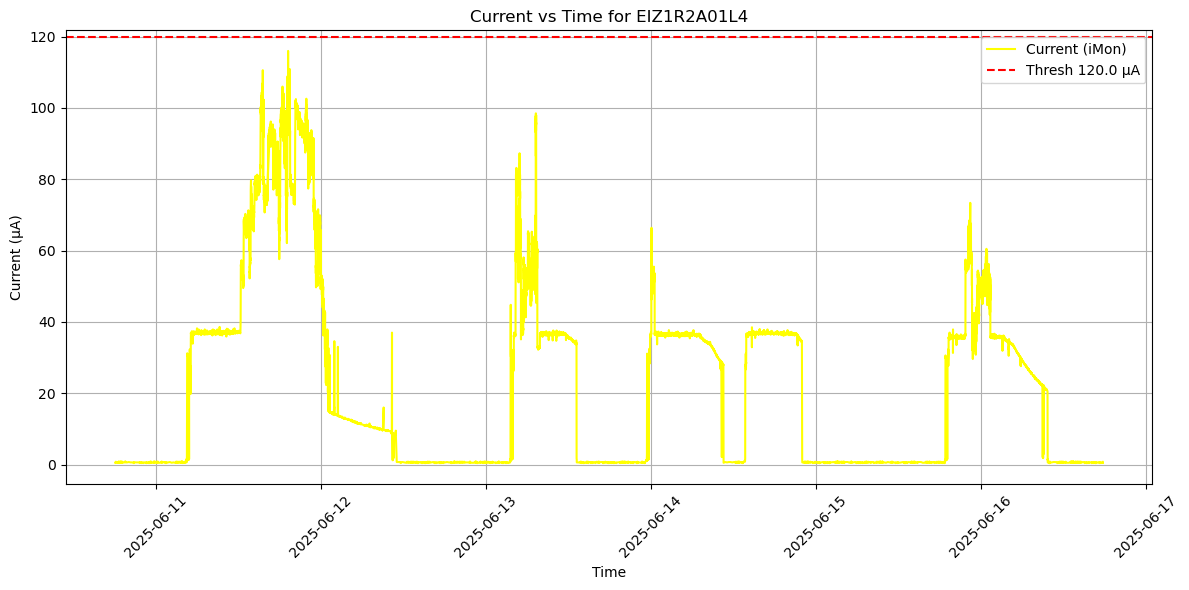

In [53]:
plot_current("EIZ1R2A01L4", color="yellow")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file (fix the path as needed)
file_path = r"C:\Users\HP\Desktop\Data\converted_data.csv"
df = pd.read_csv(file_path)

# Show the first few rows to understand the structure
df.head()

,Type,System,Group,ID,Monitor,Date,Time,Value
0,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:04:48:958,0.5
1,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:09:05:588,0.8
2,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:09:58:235,0.5
3,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:25:39:284,0.5
4,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:33:16:296,0.8


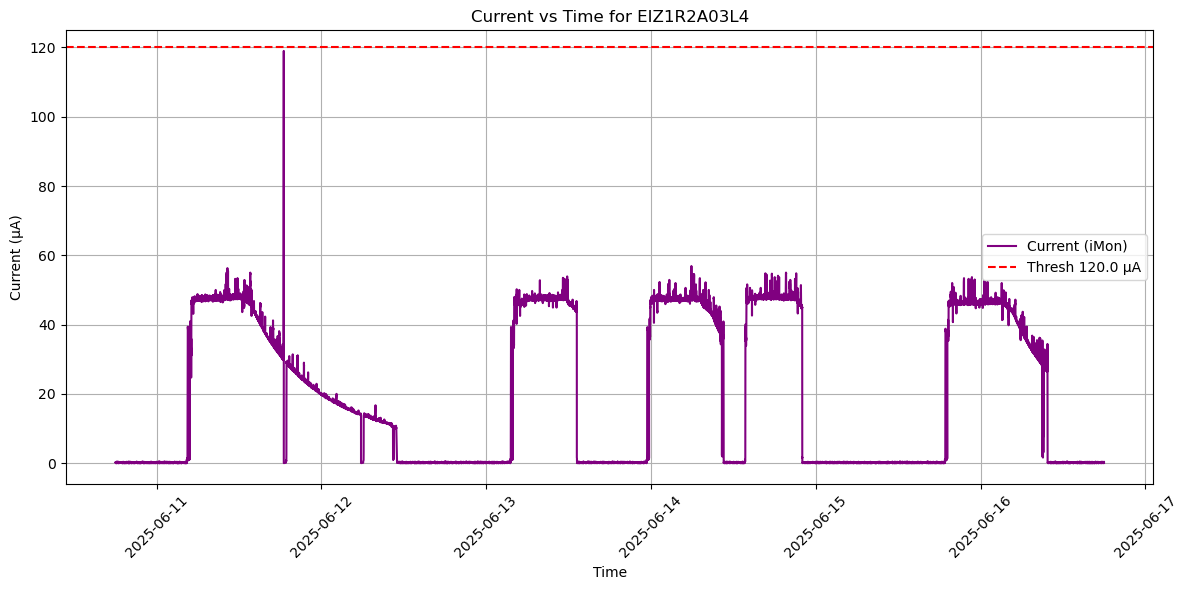

In [49]:
plot_current("EIZ1R2A03L4", color="purple")

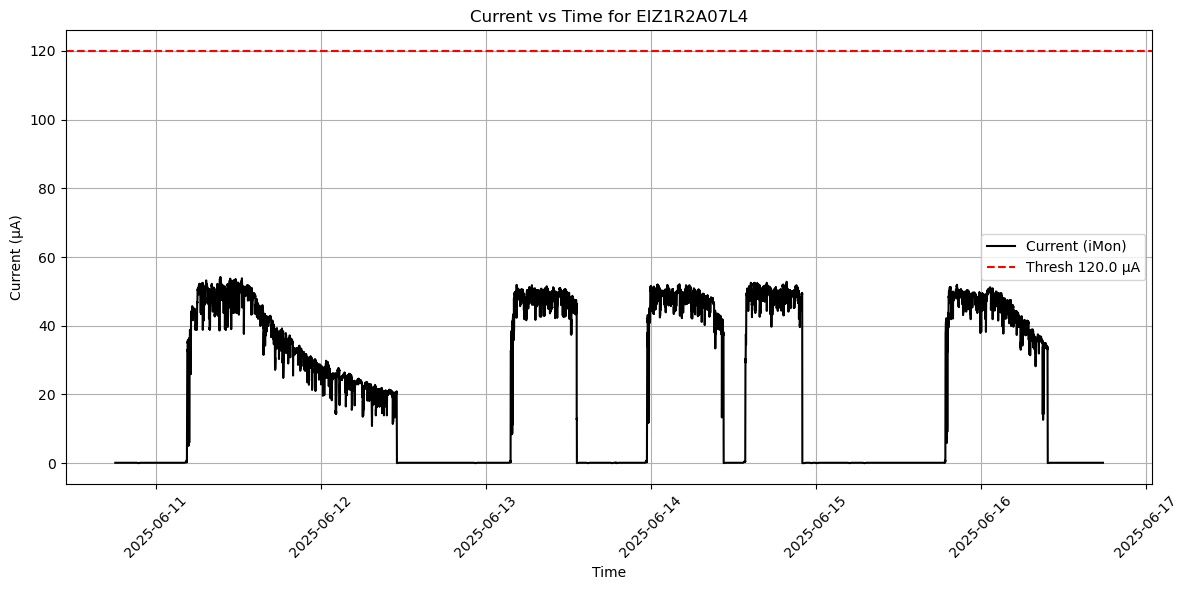

In [50]:
plot_current("EIZ1R2A07L4", color="black")

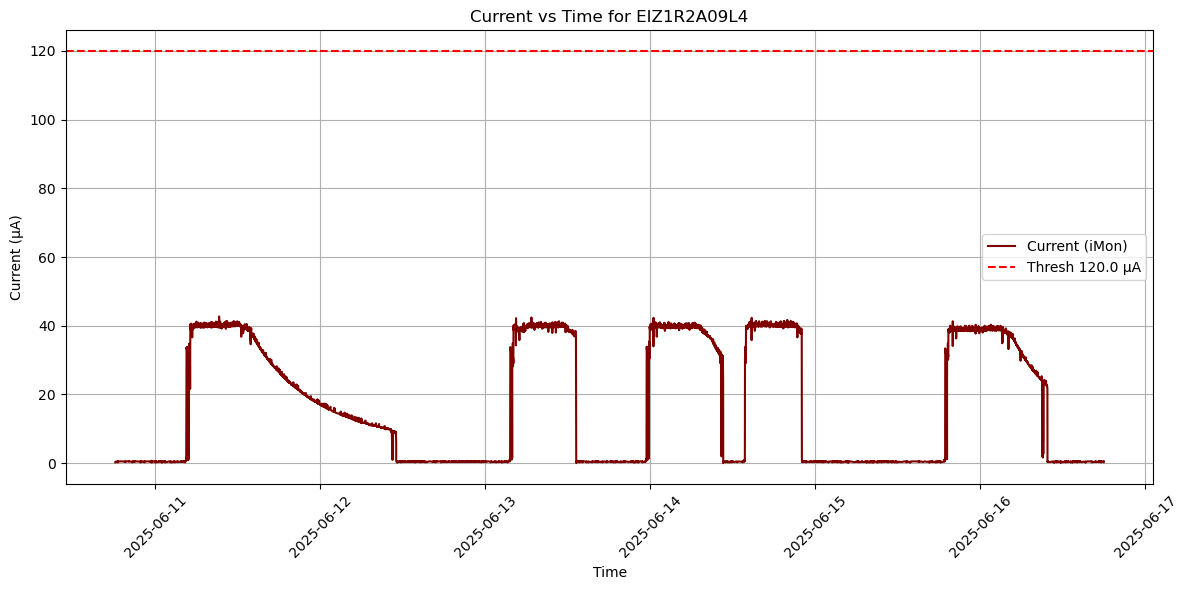

In [51]:
plot_current("EIZ1R2A09L4", color="maroon")

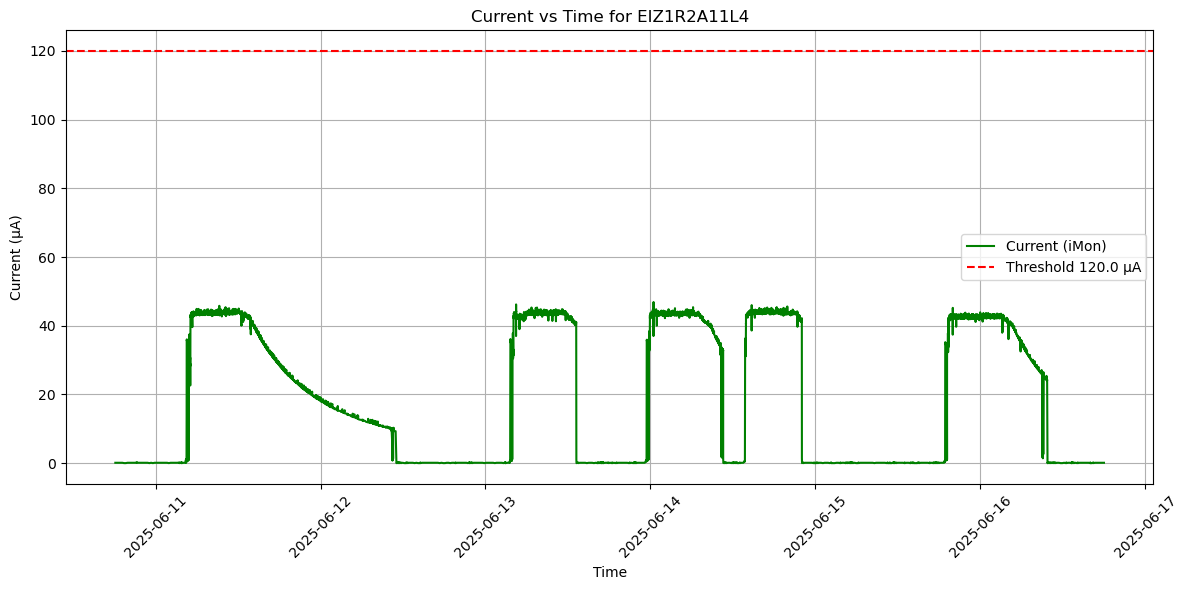

In [37]:
plot_current("EIZ1R2A11L4", color="green")

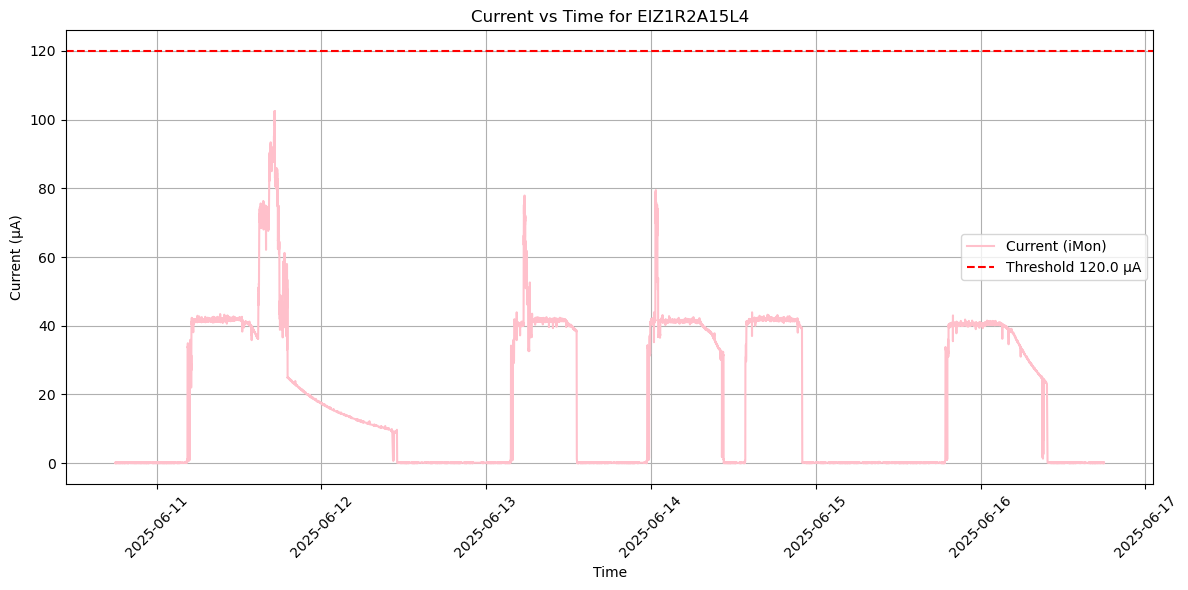

In [38]:
plot_current("EIZ1R2A15L4", color="pink")

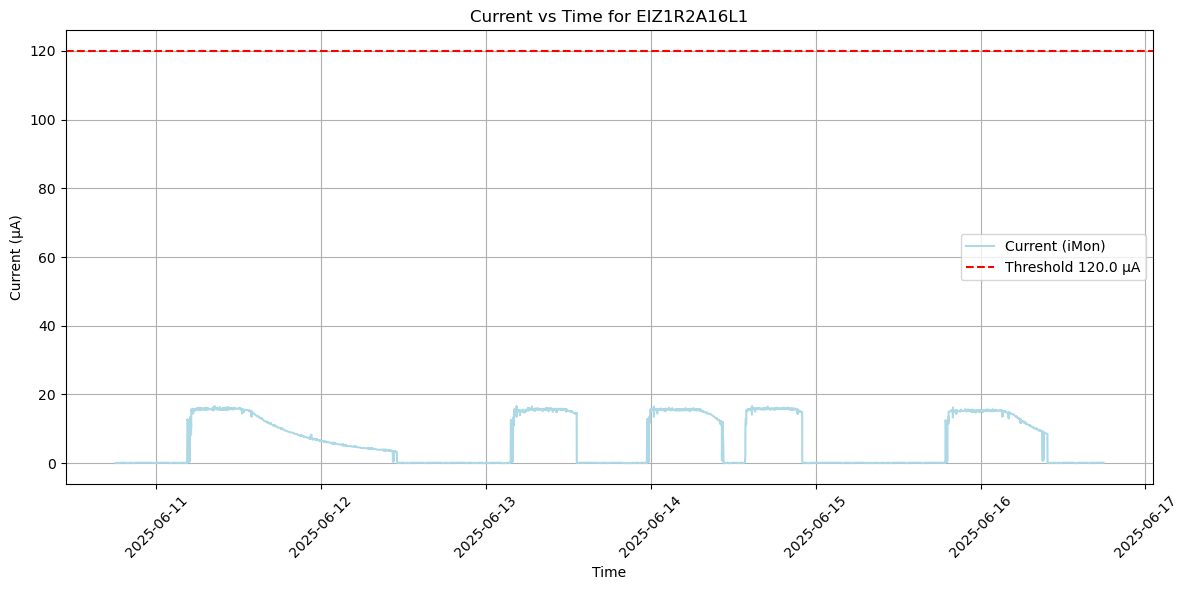

In [39]:
plot_current("EIZ1R2A16L1", color="lightblue")

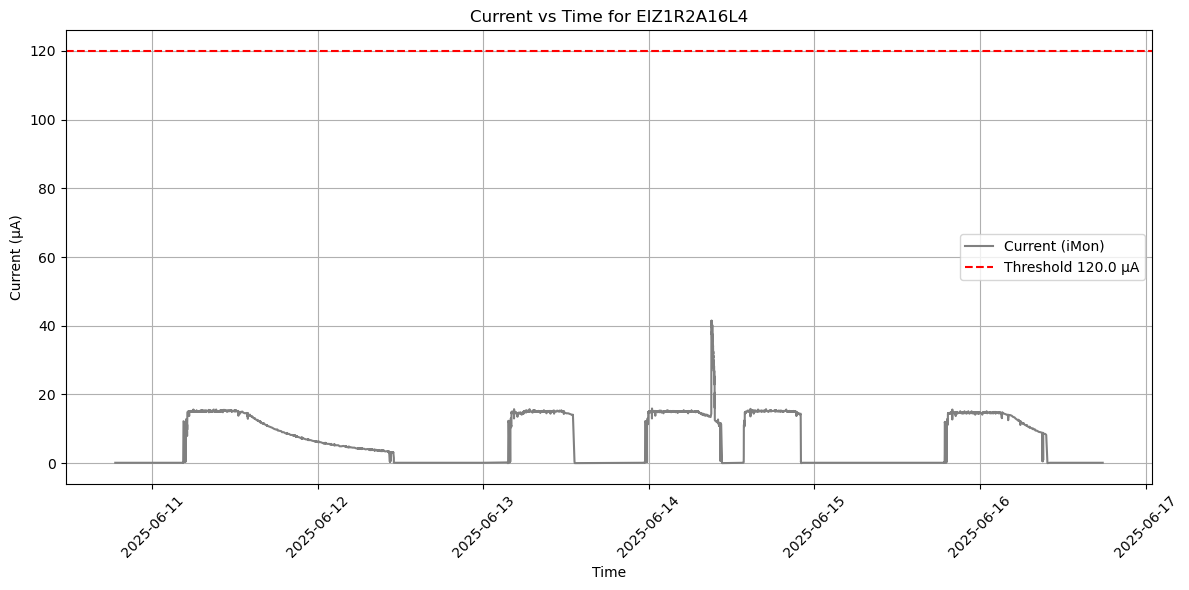

In [40]:
plot_current("EIZ1R2A16L4", color="gray")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [17]:
file_path = r"C:\Users\HP\Desktop\Data\converted_data.csv"
df = pd.read_csv(file_path)

df.head()

,Type,System,Group,ID,Monitor,Date,Time,Value
0,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:04:48:958,0.5
1,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:09:05:588,0.8
2,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:09:58:235,0.5
3,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:25:39:284,0.5
4,STG,HV,A,EIZ1R2A01L4,iMon,10-06-2025,18:33:16:296,0.8


In [3]:
import csv
import os
import glob


folder_path = 'D:\Cern application\CERN\Data1' 

txt_files = glob.glob(os.path.join(folder_path, '*.txt'))

for txt_file in txt_files:

    base_name = os.path.splitext(os.path.basename(txt_file))[0]
    csv_file = os.path.join(folder_path, f'{base_name}.csv')

    with open(txt_file, 'r') as infile, open(csv_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)

        writer.writerow(['Type', 'System', 'Group', 'ID', 'Monitor', 'Date', 'Time', 'Value'])

        for line in infile:
            parts = line.strip().split()
            if len(parts) >= 8:
                type_, system, group, id_, monitor, date, time, value = parts[:8]
                writer.writerow([type_, system, group, id_, monitor, date, time, value])

    print(f"Converted: {txt_file} -> {csv_file}")


Converted: D:\Cern application\CERN\Data1\A01.txt -> D:\Cern application\CERN\Data1\A01.csv
Converted: D:\Cern application\CERN\Data1\A02.txt -> D:\Cern application\CERN\Data1\A02.csv
Converted: D:\Cern application\CERN\Data1\A05.txt -> D:\Cern application\CERN\Data1\A05.csv
Converted: D:\Cern application\CERN\Data1\A06.txt -> D:\Cern application\CERN\Data1\A06.csv
Converted: D:\Cern application\CERN\Data1\A07.txt -> D:\Cern application\CERN\Data1\A07.csv
Converted: D:\Cern application\CERN\Data1\A08.txt -> D:\Cern application\CERN\Data1\A08.csv
Converted: D:\Cern application\CERN\Data1\A09.txt -> D:\Cern application\CERN\Data1\A09.csv
Converted: D:\Cern application\CERN\Data1\A10.txt -> D:\Cern application\CERN\Data1\A10.csv
Converted: D:\Cern application\CERN\Data1\A11.txt -> D:\Cern application\CERN\Data1\A11.csv
Converted: D:\Cern application\CERN\Data1\A14.txt -> D:\Cern application\CERN\Data1\A14.csv
Converted: D:\Cern application\CERN\Data1\C01.txt -> D:\Cern application\CERN\Da